In [103]:
from utils import cp_detector as cpd
from utils import data_generation as gen
from utils import statistic_calculation as stat
from utils import threshold_calculation as th

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

%load_ext autoreload
%autoreload 2

import torch.nn as nn
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
dataset_parameters = {
    "dataset_size": 100,
    "seq_len": 101,
    "d": 500,
    "p": 10,
    "distribution": "t-distribution",
    "k": 3,
    "cp": None,
    "nu": 3,
    "seed": 124
}

cp_parameters = {
    "alpha": 0.05,
    "scan": False,
    "data_based": False,
    "ln": False
}

In [4]:
import torch.nn as nn
import torch

data_with_cp, data_without_cp, t_cp_idxs = gen.generate_data(**dataset_parameters)

layer_norm = nn.LayerNorm(dataset_parameters["d"], elementwise_affine=False).float()
data_with_cp_ln = (
    layer_norm(torch.from_numpy(data_with_cp).float()).detach().numpy()
)
data_without_cp_ln = (
    layer_norm(torch.from_numpy(data_without_cp).float()).detach().numpy()
)

In [5]:
delta_sic_with, likelihood_cp_with = cpd.t_dist_data_inference(data_with_cp, dataset_parameters)
delta_sic_without, likelihood_cp_without = cpd.t_dist_data_inference(data_without_cp, dataset_parameters)

In [6]:
delta_sic_with_ln, likelihood_cp_with_ln = cpd.t_dist_data_inference(data_with_cp_ln, dataset_parameters)
delta_sic_without_ln, likelihood_cp_without_ln = cpd.t_dist_data_inference(data_without_cp_ln, dataset_parameters)

In [17]:
min(delta_sic_with.min(), delta_sic_without.min(), delta_sic_with_ln.min(), delta_sic_without_ln.min())

-683.7410537299784

In [4]:
plt.hist(delta_sic_with.min(1).flatten(), label='Seq with CP');
plt.hist(delta_sic_without.min(1).flatten(), label='Seq without CP');
plt.legend();

NameError: name 'plt' is not defined

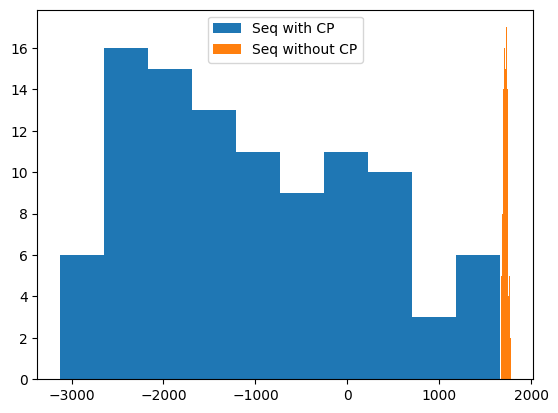

In [209]:
plt.hist(delta_sic_with_ln.min(1).flatten(), label='Seq with CP');
plt.hist(delta_sic_without_ln.min(1).flatten(), label='Seq without CP');
plt.legend();

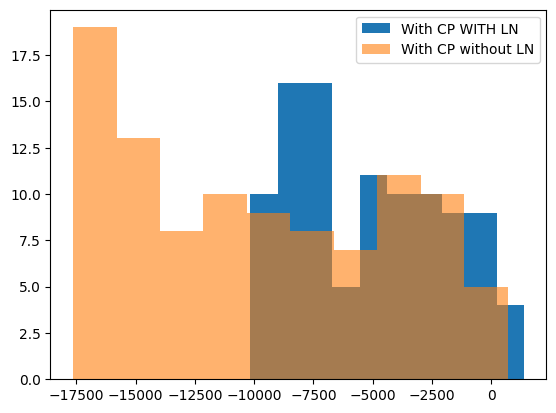

In [197]:
plt.hist(delta_sic_with_ln.min(1).flatten(), label='With CP WITH LN');
plt.hist(delta_sic_with.min(1).flatten(), alpha=0.6, label='With CP without LN');
plt.legend()

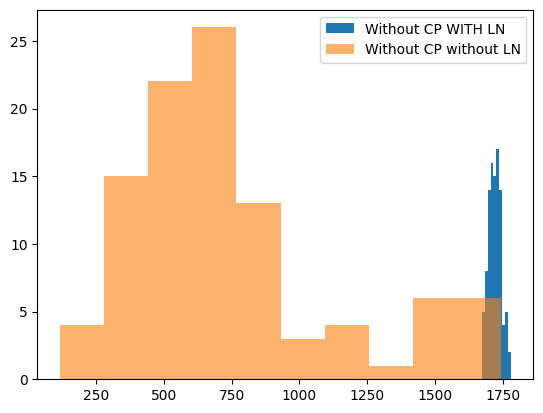

In [198]:
plt.hist(delta_sic_without_ln.min(1).flatten(), label='Without CP WITH LN');
plt.hist(delta_sic_without.min(1).flatten(), alpha=0.6, label='Without CP without LN');
plt.legend()

In [199]:
thresholds = list(range(-10000, 2000, 1))

In [200]:
fn_threshold = {}
fp_threshold = {}

fn_threshold_ln = {}
fp_threshold_ln = {}


for th in thresholds:
    detected_cp_idxs = np.where(delta_sic_with.min(1) > th, -1, likelihood_cp_with.argmin(1))
    detected_false_cp_idxs = np.where(delta_sic_without.min(1) > th, -1, likelihood_cp_without.argmin(1))
    fn, fp = cpd.calculate_error(detected_cp_idxs, detected_false_cp_idxs)
    fn_threshold[th] = fn
    fp_threshold[th] = fp

    detected_cp_idxs_ln = np.where(delta_sic_with_ln.min(1) > th, -1, likelihood_cp_with_ln.argmin(1))
    detected_false_cp_idxs_ln = np.where(delta_sic_without_ln.min(1) > th, -1, likelihood_cp_without_ln.argmin(1))
    fn_ln, fp_ln = cpd.calculate_error(detected_cp_idxs_ln, detected_false_cp_idxs_ln)
    fn_threshold_ln[th] = fn_ln
    fp_threshold_ln[th] = fp_ln

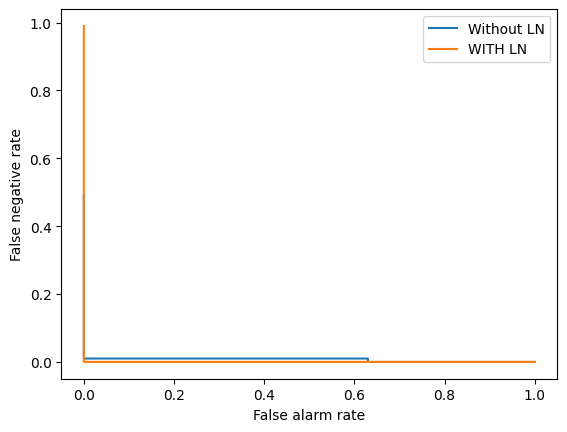

In [201]:
plt.plot(
    [value for value in fp_threshold.values()],
    [value for value in fn_threshold.values()],
    #"o",
    label="Without LN"
)

plt.plot(
    [value for value in fp_threshold_ln.values()],
    [value for value in fn_threshold_ln.values()],
    #"s",
    label="WITH LN"
)

plt.xlabel("False alarm rate")
plt.ylabel("False negative rate");
plt.legend()

In [87]:
import pickle
with open("outputs/2024-02-21/14-46-29/beta_ln.pickle", "rb") as f:
    fn_threshold_ln = pickle.load(f)
with open("outputs/2024-02-21/14-46-29/beta.pickle", "rb") as f:
    fn_threshold = pickle.load(f)


with open("outputs/2024-02-21/14-46-29/alpha_ln.pickle", "rb") as f:
    fp_threshold_ln = pickle.load(f)
with open("outputs/2024-02-21/14-46-29/alpha.pickle", "rb") as f:
    fp_threshold = pickle.load(f)

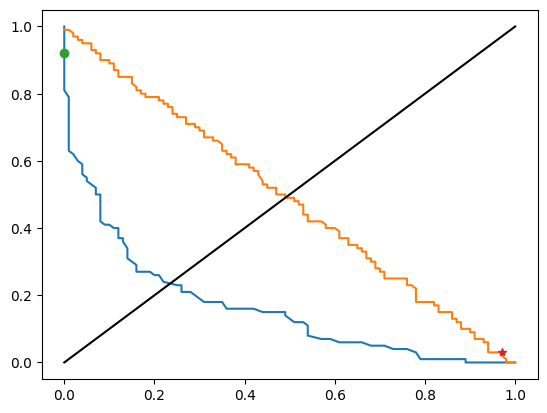

In [137]:
plt.plot(
    [value for value in fp_threshold_ln.values()],
    [value for value in fn_threshold_ln.values()],
    #"s",
    label="WITH LN")

plt.plot(
    [value for value in fp_threshold.values()],
    [value for value in fn_threshold.values()],
    #"s",
    label="Without LN")


th = -1172
#th = -4000
plt.plot(
    fp_threshold_ln[th], fn_threshold_ln[th], 'o')
plt.plot(
    fp_threshold[th], fn_threshold[th], '*')
plt.plot([0, 1], [0, 1], 'k-')


In [2]:
from scipy.stats import chi2

In [100]:
dataset_parameters = {
    "dataset_size": 100,
    "seq_len": 101,
    "d": 1000,
    "p": 10,
    "distribution": "t-distribution",
    "k": 1,
    "cp": None,
    "nu": 3,
    "seed": 124
}

cp_parameters = {
    "alpha": 0.05,
    "scan": False,
    "data_based": False,
    "ln": False
}

In [104]:
data_with_cp, data_without_cp, t_cp_idxs = gen.generate_data(**dataset_parameters)

layer_norm = nn.LayerNorm(dataset_parameters["d"], elementwise_affine=False).float()
data_with_cp_ln = (
    layer_norm(torch.from_numpy(data_with_cp).float()).detach().numpy()
)
data_without_cp_ln = (
    layer_norm(torch.from_numpy(data_without_cp).float()).detach().numpy()
)

delta_sic_with, likelihood_cp_with = cpd.t_dist_data_inference(data_with_cp, dataset_parameters)
delta_sic_without, likelihood_cp_without = cpd.t_dist_data_inference(data_without_cp, dataset_parameters)

delta_sic_with_ln, likelihood_cp_with_ln = cpd.t_dist_data_inference(data_with_cp_ln, dataset_parameters)
delta_sic_without_ln, likelihood_cp_without_ln = cpd.t_dist_data_inference(data_without_cp_ln, dataset_parameters)

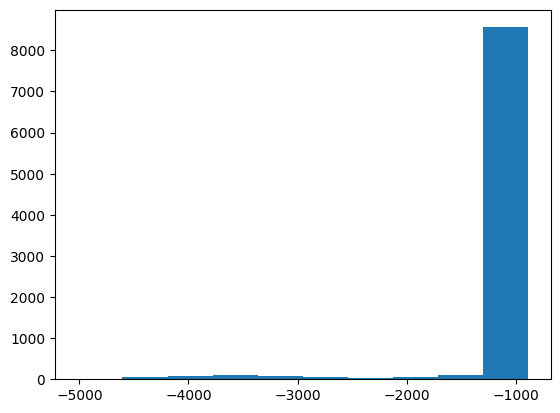

In [144]:
plt.hist(delta_sic_without[:,5:-5].flatten());

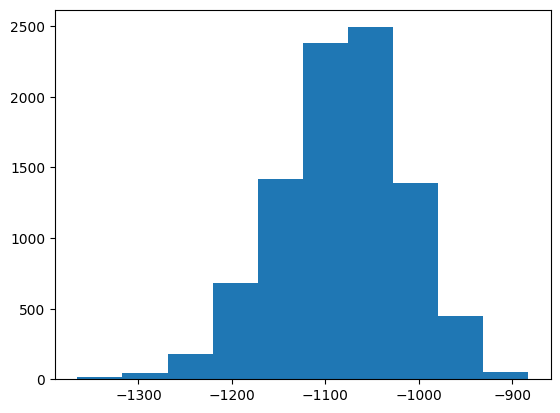

In [108]:
plt.hist(delta_sic_with_ln[:,5:-5].flatten());

(array([   6.,   26.,  195.,  653., 1526., 2532., 2473., 1306.,  344.,
          39.]),
 array([-1246.14214527, -1209.00818941, -1171.87423355, -1134.7402777 ,
        -1097.60632184, -1060.47236598, -1023.33841012,  -986.20445427,
         -949.07049841,  -911.93654255,  -874.8025867 ]),
 <BarContainer object of 10 artists>)

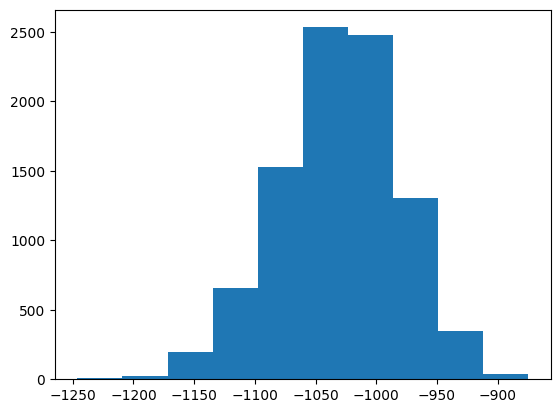

In [109]:
plt.hist(delta_sic_without_ln[:, 5:-5].flatten())


In [146]:
np.quantile(delta_sic_without_ln[:, 5:-5].flatten(), 0.005)

-1164.9308616312087

In [147]:
np.quantile(delta_sic_with_ln[:, 5:-5].flatten(), 0.005)

-1277.3673944604805

In [145]:
np.quantile(delta_sic_without[:, 5:-5].flatten(), 0.005)

-4232.8084374577265

In [142]:
np.quantile(delta_sic_with[:, 5:-5].flatten(), 0.1)

-1256.7196415536105